# 지수 평활

<Axes: >

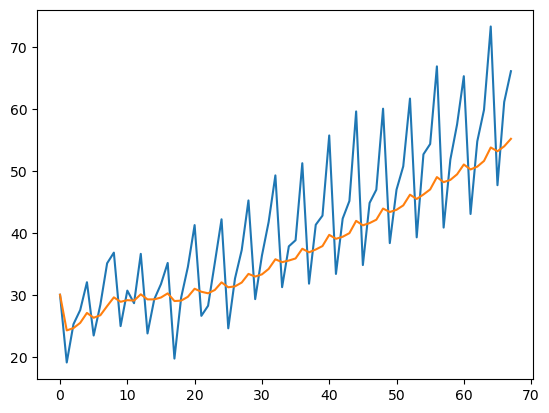

In [2]:
import pandas as pd
df = pd.read_excel('ausvisitor.xlsx')
y = df.visitor
y.plot()
y.ewm(alpha=0.1).mean().plot()

## 단순지수평활 ETS(A, N, N)

In [3]:
from statsmodels.tsa.api import ETSModel
ets_ann = ETSModel(y).fit()
ets_ann.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                visitor   No. Observations:                   68
Model:                       ETS(ANN)   Log Likelihood                -240.535
Date:                Thu, 08 Aug 2024   AIC                            487.070
Time:                        17:25:13   BIC                            493.729
Sample:                             0   HQIC                           489.709
                                 - 68   Scale                           69.178
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.1964      0.048      4.101      0.000       0.103       0.290
initial_level      27.5115      4.976      5.529      0.000      17.758      37.265
===================================================================================
Ljung-Box (Q):                       10.91   Jarque-Bera (JB):                 1.20
Prob(Q):                              0.00   Prob(JB):                         0.55
Heteroskedasticity (H):               2.57   Skew:                            -0.00
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

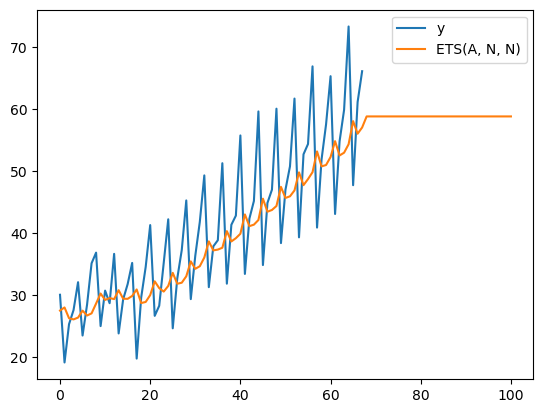

In [4]:
import matplotlib.pyplot as plt
y.plot(label='y')
ets_ann.predict(start=0, end=100).plot(label='ETS(A, N, N)')
plt.legend();


## 홀트의 선형 추세 기법 ETS(A, A, N)

In [5]:
ets_aan = ETSModel(y, trend='add').fit()
ets_aan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                visitor   No. Observations:                   68
Model:                       ETS(AAN)   Log Likelihood                -231.928
Date:                Thu, 08 Aug 2024   AIC                            473.856
Time:                        17:25:37   BIC                            484.954
Sample:                             0   HQIC                           478.254
                                 - 68   Scale                           53.707
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0097        nan        nan        nan         nan         nan
smoothing_trend     0.0097      0.006      1.680      0.093      -0.002       0.021
initial_level      25.1272      1.738     14.461      0.000      21.722      28.533
initial_trend       0.1841      0.169      1.089      0.276      -0.147       0.516
===================================================================================
Ljung-Box (Q):                       11.15   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.00   Prob(JB):                         0.65
Heteroskedasticity (H):               2.53   Skew:                             0.01
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""


예측

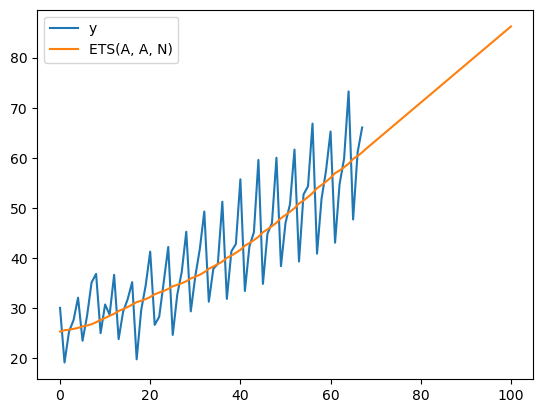

In [6]:
y.plot(label='y')
ets_aan.predict(start=0, end=100).plot(label='ETS(A, A, N)')
plt.legend();

## 감쇠 추세 기법 ETS(A, Ad, N)

In [7]:
ets_aadn = ETSModel(y, trend='add', damped_trend=True).fit()
ets_aadn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                visitor   No. Observations:                   68
Model:                      ETS(AAdN)   Log Likelihood                -232.737
Date:                Thu, 08 Aug 2024   AIC                            477.473
Time:                        17:26:12   BIC                            490.790
Sample:                             0   HQIC                           482.750
                                 - 68   Scale                           54.999
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0164      0.089      0.185      0.853      -0.158       0.191
smoothing_trend     0.0164      0.023      0.730      0.466      -0.028       0.061
damping_trend       0.9800      0.069     14.112      0.000       0.844       1.116
initial_level      26.2533      3.205      8.192      0.000      19.972      32.535
initial_trend       0.1244      0.318      0.392      0.695      -0.498       0.747
===================================================================================
Ljung-Box (Q):                       10.90   Jarque-Bera (JB):                 0.91
Prob(Q):                              0.00   Prob(JB):                         0.63
Heteroskedasticity (H):               2.59   Skew:                             0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

예측

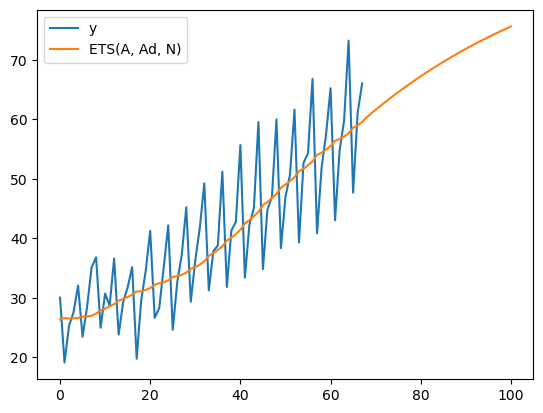

In [8]:
y.plot(label='y')
ets_aadn.predict(start=0, end=100).plot(label='ETS(A, Ad, N)')
plt.legend();


## 홀트-윈터스의 계절성 기법 ETS(A, A, A)

In [9]:
ets_aaa = ETSModel(y, trend='add', seasonal='add', seasonal_periods=4).fit()
ets_aaa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                visitor   No. Observations:                   68
Model:                       ETS(AAA)   Log Likelihood                -150.480
Date:                Thu, 08 Aug 2024   AIC                            320.960
Time:                        17:26:47   BIC                            343.155
Sample:                             0   HQIC                           329.754
                                 - 68   Scale                            4.894
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.3042      0.099      3.075      0.002       0.110       0.498
smoothing_trend     3.042e-05        nan        nan        nan         nan         nan
smoothing_seasonal     0.4154      0.082      5.057      0.000       0.254       0.576
initial_level         29.4939        nan        nan        nan         nan         nan
initial_trend          0.5711      0.113      5.076      0.000       0.351       0.792
initial_seasonal.0    -3.4686        nan        nan        nan         nan         nan
initial_seasonal.1    -5.9855        nan        nan        nan         nan         nan
initial_seasonal.2   -11.4778        nan        nan        nan         nan         nan
initial_seasonal.3          0        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                        5.11   Jarque-Bera (JB):                 8.62
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               0.48   Skew:                            -0.68
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

예측

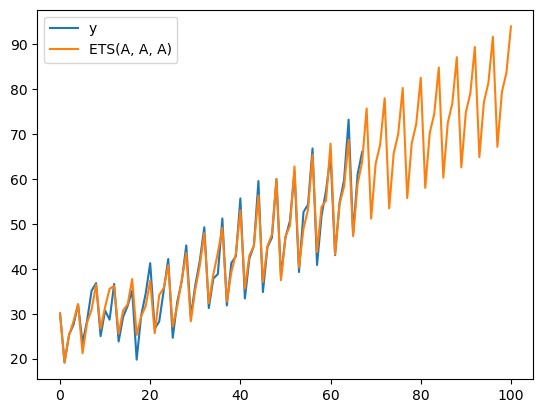

In [10]:
y.plot(label='y')
ets_aaa.predict(start=0, end=100).plot(label='ETS(A, A, A)')
plt.legend();